# Multilabel Classification of Inflammatory Diseases using Logistic Regression by Amun
I am very happy that I finally figured out how to make [Markdown](https://www.youtube.com/watch?v=uVLzL5E-YBM&ab_channel=ReuvenLerner) cells :-)

### Importing libraries


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
import numpy as np
from sklearn import metrics
from sklearn.metrics import confusion_matrix
%matplotlib inline

### Read in data

In [2]:
df = pd.read_excel("SLE_cytokines.xlsx")
#Assign input and output data
X = df[df.columns[6:]].head(23)
y = df[["Systemic Lupus based on SLICC criteria", "Discoid Lupus", "Arthritis"]].head(23)
df.head()

,Unnamed: 0,Patient code,Systemic Lupus based on SLICC criteria,Discoid Lupus,Arthritis,Unnamed: 5,TNF-α (pg/ml),IL-13 (pg/ml),IL-4 (pg/ml),IL-10 (pg/ml),...,PTX3 (pg/ml),sCD40L (pg/ml),sCD25 (IL-2Ra) (pg/ml),CXCL12 (pg/ml),sST2 (pg/ml),sTNF-RI (pg/ml),sTNF-RII (pg/ml),sRAGE (pg/ml),CX3CL1 (pg/ml),sCD130 (gp130) (pg/ml)
0,NaN,375.0,NaN,NaN,NaN,NaN,18.28,31.62,26.9,15.59,...,4985.8,21005.3,3292.55,421.6,958.6,1120.4,286.14,73.3,3217.3,74422.2
1,NaN,402.0,Yes,Yes,Yes,NaN,24.02,7.89,25.21,2.69,...,4319.1,19623.3,2849.39,320.6,180.5,801.54,199.23,122.1,5269.5,50168.6
2,NaN,397.0,Yes,No,Yes,NaN,10.56,6.77,1.99,1.76,...,4690.7,29593.4,13213,965.2,276,3613.53,211.13,607.9,1453,122910
3,NaN,181.0,Yes,No,No,NaN,1.72,6.77,23.52,3.01,...,6911.7,23946.9,4378.48,1941.9,236.6,1963.86,97.67,99.8,1856.8,166542
4,NaN,190.0,Yes,Yes,Yes,NaN,5.06,6.77,4.4,1.76,...,6593.1,43790.6,3833.76,1626.4,316.7,844.37,103.46,144.5,2102.9,108096


## Data preprocessing
### Remove rows without classes

In [3]:
liste = []
for i in range(0, 23):
    if pd.isnull(y.iloc[i,0]):
        liste.append(i)
y = y.drop(liste)
X = X.drop(liste)
y.head()

,Systemic Lupus based on SLICC criteria,Discoid Lupus,Arthritis
1,Yes,Yes,Yes
2,Yes,No,Yes
3,Yes,No,No
4,Yes,Yes,Yes
6,Yes,No,Yes


### Make the multilabel problem a multiclass problem

In [4]:
# A df called "diseases" with one column and zeros with the length of amount of rows
data = np.zeros(y.shape[0])
diseases = pd.DataFrame(data, columns = ["Diseases"])
#Combine the diseases to create eight possible classes
for i in range(0, y.shape[0]):
    if y.iloc[i,0]== "Yes" and y.iloc[i,1] == "Yes" and y.iloc[i,2] == "Yes":
        diseases.iloc[i,0] = "Systemic Lupus + Discoid Lupus + Arthritis"
    if y.iloc[i,0]== "Yes" and y.iloc[i,1] == "Yes" and y.iloc[i,2] == "No":
        diseases.iloc[i,0] = "Systemic Lupus + Discoid Lupus"   
    if y.iloc[i,0]== "Yes" and y.iloc[i,1] == "No" and y.iloc[i,2] == "Yes":
        diseases.iloc[i,0] = "Systemic Lupus + Arthritis"
    if y.iloc[i,0]== "No" and y.iloc[i,1] == "Yes" and y.iloc[i,2] == "Yes":
        diseases.iloc[i,0] = "Discoid Lupus + Arthritis"
    if y.iloc[i,0]== "Yes" and y.iloc[i,1] == "No" and y.iloc[i,2] == "No":
        diseases.iloc[i,0] = "Systemic Lupus"
    if y.iloc[i,0]== "No" and y.iloc[i,1] == "Yes" and y.iloc[i,2] == "No":
        diseases.iloc[i,0] = "Discoid Lupus"
    if y.iloc[i,0]== "No" and y.iloc[i,1] == "No" and y.iloc[i,2] == "Yes":
        diseases.iloc[i,0] = "Arthritis"
        
y = diseases
y

,Diseases
0,Systemic Lupus + Discoid Lupus + Arthritis
1,Systemic Lupus + Arthritis
2,Systemic Lupus
3,Systemic Lupus + Discoid Lupus + Arthritis
4,Systemic Lupus + Arthritis
5,Systemic Lupus + Arthritis
6,Systemic Lupus + Discoid Lupus + Arthritis
7,Systemic Lupus + Arthritis
8,Systemic Lupus + Arthritis
9,Systemic Lupus + Arthritis


### Split the data and scale it for better regression

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)
s = StandardScaler()
s.fit(X_train)
X_train = s.transform(X_train)
X_test = s.transform(X_test)

### Train the model

In [6]:
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred

/Users/amunstalder/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


array(['Systemic Lupus + Arthritis', 'Systemic Lupus',
       'Systemic Lupus + Arthritis', 'Systemic Lupus + Arthritis',
       'Systemic Lupus + Arthritis'], dtype=object)

### Show R2 score

In [7]:
print("R2 score is " + str(model.score(X_test, y_test)))

R2 score is 0.4


### Confusion matrix

Confusion matrix, without normalization
[[0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 1 0 0 2]]


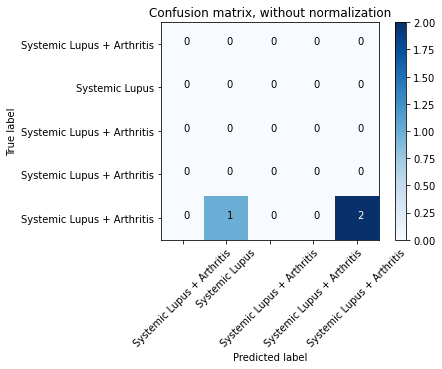

In [8]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    import itertools
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="left",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
#    plt.tight_layout()
cnf_matrix = confusion_matrix(y_test, y_pred,labels=['Systemic Lupus + Arthritis', 'Systemic Lupus',
       'Systemic Lupus + Arthritis', 'Systemic Lupus + Arthritis',
       'Systemic Lupus + Arthritis'])
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Systemic Lupus + Arthritis', 'Systemic Lupus',
       'Systemic Lupus + Arthritis', 'Systemic Lupus + Arthritis',
       'Systemic Lupus + Arthritis'],
                      title='Confusion matrix, without normalization')

## Conclusion
The datafile only contained 23 rows out of which about 5 didn't have a label and were excluded from the data. There is by far to few data in order to make a sophisticated model and the r2 values of 0.4 is also very low. I am not sure whether the production of a multiclass problem rather than trying a multi label problem was the right approach, but we learned something on the fly.